# Ahmet Celal Gündoğdu || 2020100093 || MIS49Y


In [2]:
# Importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium 
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

import seaborn as sns 
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df = pd.read_csv('onlinedeliverydata.csv')

In [4]:
df.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,...,Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,NIL
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Unimportant,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,...,Moderately Important,Important,Moderately Important,Slightly Important,Important,Moderately Important,Very Important,Very Important,Yes,NIL
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil


In [5]:
#Sorted column names.
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [6]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [7]:
#Is there any null values?
print("Shape: %d rows and %d columns" % df.shape)
df.isnull().sum()

Shape: 388 rows and 55 columns


Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

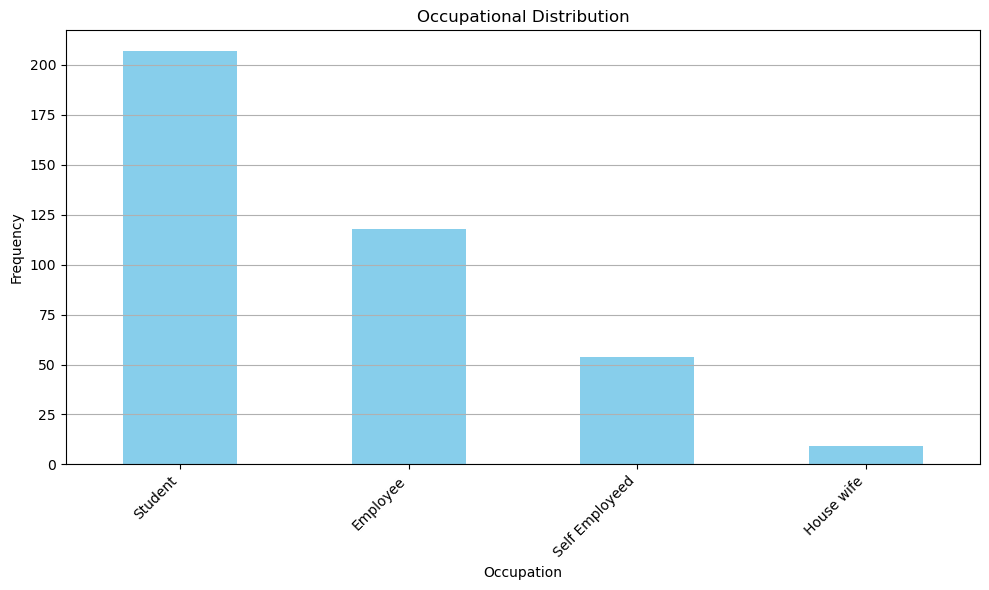

In [8]:

occupation_counts = df['Occupation'].value_counts()

# Visualization of bar chart of professions
plt.figure(figsize=(10,6))
occupation_counts.plot(kind='bar', color='skyblue')
plt.title('Occupational Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
occupation_colors = {
    'Student': 'blue',
    'Employee': 'green',
    'Self Employeed': 'red',
    'House wife': 'purple'
}
# Creating a map.
start_location = [df['latitude'].mean(), df['longitude'].mean()]
map_with_legend = folium.Map(location=start_location, zoom_start=12)

# Adding MarkerCluster
marker_cluster_with_legend = MarkerCluster().add_to(map_with_legend)

# Adding points representing each occupational group to the map
for _, row in df.iterrows():
    occupation_color = occupation_colors[row['Occupation']]
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        popup=row['Occupation'],
                        fill_color=occupation_color,
                        color=occupation_color,
                        fill_opacity=0.7).add_to(marker_cluster_with_legend)
    

# Legend
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 150px; height: 125px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">&nbsp; Occupation Legend <br>
     &nbsp; <i style="background:blue; width:10px; height:10px; border-radius:50%; display:inline-block;"></i> Student &nbsp; <br>
     &nbsp; <i style="background:green; width:10px; height:10px; border-radius:50%; display:inline-block;"></i> Employee &nbsp; <br>
     &nbsp; <i style="background:red; width:10px; height:10px; border-radius:50%; display:inline-block;"></i> Self Employeed &nbsp; <br>
     &nbsp; <i style="background:purple; width:10px; height:10px; border-radius:50%; display:inline-block;"></i> House wife &nbsp; <br>
</div>
'''

# Adding legend on map 
map_with_legend.get_root().html.add_child(folium.Element(legend_html))


map_with_legend



In [9]:
# Checking the number and types of marital statuses
unique_marital_statuses = df['Marital Status'].unique()
num_unique_marital_statuses = len(unique_marital_statuses)

num_unique_marital_statuses, unique_marital_statuses


(3, array(['Single', 'Married', 'Prefer not to say'], dtype=object))

In [10]:
# Creating the map.
marital_status_colors = {
    'Single': 'blue',
    'Married': 'green',
    'Prefer not to say': 'gray'
}
marital_status_symbols = {
    'Single': 'circle',
    'Married': 'triangle',
    'Prefer not to say': 'square'
}
map_marital_status = folium.Map(location=start_location, zoom_start=12)

# Adding MarkerCluster.
marker_cluster_marital_status = MarkerCluster().add_to(map_marital_status)

# Adding the marital status.
for _, row in df.iterrows():
    marital_status_color = marital_status_colors[row['Marital Status']]
    marital_status_symbol = marital_status_symbols[row['Marital Status']]
    
    # Marker creation. 
    if marital_status_symbol == 'circle':
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=5,
                            popup=row['Marital Status'],
                            fill_color=marital_status_color,
                            color=marital_status_color,
                            fill_opacity=0.7).add_to(marker_cluster_marital_status)
    elif marital_status_symbol == 'triangle':
        folium.RegularPolygonMarker(location=[row['latitude'], row['longitude']],
                                    number_of_sides=3,
                                    radius=5,
                                    popup=row['Marital Status'],
                                    fill_color=marital_status_color,
                                    color=marital_status_color,
                                    fill_opacity=0.7).add_to(marker_cluster_marital_status)
    else: 
        folium.RegularPolygonMarker(location=[row['latitude'], row['longitude']],
                                    number_of_sides=4,
                                    radius=5,
                                    popup=row['Marital Status'],
                                    fill_color=marital_status_color,
                                    color=marital_status_color,
                                    fill_opacity=0.7).add_to(marker_cluster_marital_status)

        legend_html_marital_status = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 125px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">&nbsp; Marital Status Legend <br>
     &nbsp; <i style="background:blue; width:10px; height:10px; border-radius:50%; display:inline-block;"></i> Single &nbsp; <br>
     &nbsp; <i style="background:green; width:10px; height:10px; border-radius:50%; display:inline-block;"></i> Married &nbsp; <br>
     &nbsp; <i style="background:gray; width:10px; height:10px; border-radius:50%; display:inline-block;"></i> Prefer not to say &nbsp; <br>
</div>
'''


# Adding legend on map. 
map_marital_status.get_root().html.add_child(folium.Element(legend_html_marital_status))

map_marital_status


In [11]:
# Checking data types and unique values of 'Less delivery time' and 'Temperature' columns
delivery_speed_column = 'Less Delivery time' 
temperature_column = 'Temperature'

delivery_speed_unique_values = df[delivery_speed_column].unique()
temperature_unique_values = df[temperature_column].unique()

delivery_speed_unique_values, temperature_unique_values


(array(['Moderately Important', 'Very Important', 'Important',
        'Slightly Important', 'Unimportant'], dtype=object),
 array(['Moderately Important', 'Very Important', 'Important',
        'Slightly Important', 'Unimportant'], dtype=object))

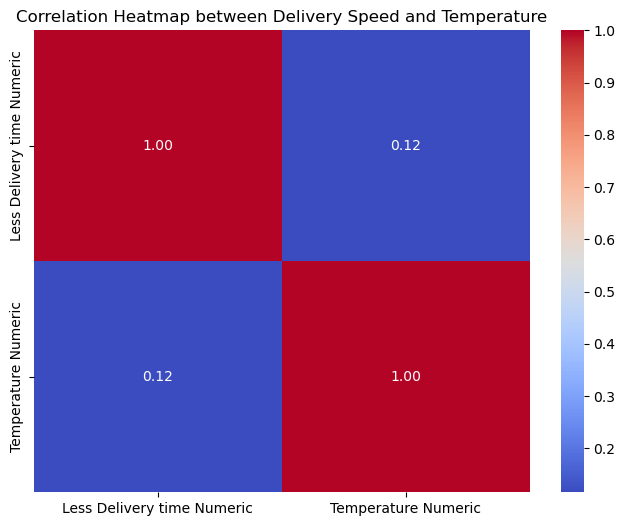

In [12]:
# Due to the class of dataframe I assigned values for each word. 
def convert_to_numeric(category):
    mapping = {
        'Unimportant': 1,
        'Slightly Important': 2,
        'Important': 3,
        'Moderately Important': 4,
        'Very Important': 5
    }
    return mapping.get(category, np.nan)  # If the category does not contain on the dict return NaN

# Convert categorical values to numeric values
df['Less Delivery time Numeric'] = df[delivery_speed_column].apply(convert_to_numeric)
df['Temperature Numeric'] = df[temperature_column].apply(convert_to_numeric)

# Correlation matrix.
correlation_matrix = df[['Less Delivery time Numeric', 'Temperature Numeric']].corr()

# Heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between Delivery Speed and Temperature')
plt.show()

In [13]:
# Filtering the records with 'Important', 'Moderately Important', 'Very Important' in the 'Less Delivery time' column
important_delivery_time_df = df[df['Less Delivery time'].isin(['Important', 'Moderately Important', 'Very Important'])]

# Preparing a list of locations.
locations = important_delivery_time_df[['latitude', 'longitude']].values.tolist()

# Creating the heatmap.
map_heatmap_important_delivery_time = folium.Map(location=start_location, zoom_start=12)
HeatMap(locations, radius=10).add_to(map_heatmap_important_delivery_time)

map_heatmap_important_delivery_time


In [14]:
# Legend colors.
education_colors = {
    'Illiterate': 'red',
    'Under Graduate': 'blue',
    'Graduate': 'green',
    'Post Graduate': 'purple',
    'Phd': 'orange'
}
education_icons = {
    'Illiterate': 'exclamation-sign',
    'Under Graduate': 'education',
    'Graduate': 'briefcase',
    'Post Graduate': 'book',
    'Phd': 'blackboard'
}

# Creating new map and addign MarkerCluster
map_education_cluster_with_legend = folium.Map(location=start_location, zoom_start=12)
marker_cluster_with_legend = MarkerCluster().add_to(map_education_cluster_with_legend)

# Add markers to the map based on training levels
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(icon=education_icons.get(row['Educational Qualifications'], 'question-sign'), 
                         color=education_colors.get(row['Educational Qualifications'], 'gray')),
        popup=f"Educational Qualifications: {row['Educational Qualifications']}"
    ).add_to(marker_cluster_with_legend)

# Adding legend.
# non breaking space 
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; width: 150px; height: 180px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
&nbsp;<b>Education Levels:</b><br>
&nbsp;<i class="fa fa-exclamation-sign" style="color:red"></i>&nbsp;Illiterate<br>
&nbsp;<i class="fa fa-education" style="color:blue"></i>&nbsp;Under Graduate<br>
&nbsp;<i class="fa fa-briefcase" style="color:green"></i>&nbsp;Graduate<br>
&nbsp;<i class="fa fa-book" style="color:purple"></i>&nbsp;Post Graduate<br>
&nbsp;<i class="fa fa-blackboard" style="color:orange"></i>&nbsp;Phd
</div>"""

map_education_cluster_with_legend.get_root().html.add_child(folium.Element(legend_html))

map_education_cluster_with_legend


In [15]:
# Determining colors based on politeness levels.
politeness_colors = {
    'Rude': 'red',
    'Neutral': 'blue',
    'Polite': 'green'
}

# Determining the symbols based on politeness levels.
politeness_icons = {
    'Rude': 'thumbs-down',
    'Neutral': 'hand-right',
    'Polite': 'thumbs-up'
}

# Creating new map and Cluster Marker.
map_politeness_cluster_with_legend = folium.Map(location=start_location, zoom_start=12)
marker_cluster_politeness_with_legend = MarkerCluster().add_to(map_politeness_cluster_with_legend)

# Adding markers to the map based on Politeness levels
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(icon=politeness_icons.get(row['Politeness'], 'question-sign'), 
                         color=politeness_colors.get(row['Politeness'], 'gray')),
        popup=f"Politeness: {row['Politeness']}"
    ).add_to(marker_cluster_politeness_with_legend)

# Legend
legend_html_politeness = """
<div style="position: fixed; bottom: 50px; left: 50px; width: 150px; height: 130px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
&nbsp;<b>Politeness Levels:</b><br>
&nbsp;<i class="fa fa-thumbs-down" style="color:red"></i>&nbsp;Rude<br>
&nbsp;<i class="fa fa-hand-right" style="color:blue"></i>&nbsp;Neutral<br>
&nbsp;<i class="fa fa-thumbs-up" style="color:green"></i>&nbsp;Polite
</div>"""

map_politeness_cluster_with_legend.get_root().html.add_child(folium.Element(legend_html_politeness))

map_politeness_cluster_with_legend
